## Model Trainer using the FastAI Library - basic

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64 # dependent on GPU in use

### Obtaining the Dataset
Uncomment and run this section after first downloading the repo to get the data.

In [4]:
from pathlib import Path

In [5]:
path = Path('./data')
path

PosixPath('data')

In [6]:
# ! kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p "{path}"
# ! unzip "{path}/skin-cancer-malignant-vs-benign.zip" -d "{path}"

100%|███████████████████████████████████████▉| 324M/325M [00:33<00:00, 10.8MB/s]
100%|████████████████████████████████████████| 325M/325M [00:34<00:00, 10.0MB/s]
Archive:  data/skin-cancer-malignant-vs-benign.zip
  inflating: data/data/test/benign/1.jpg  
  inflating: data/data/test/benign/10.jpg  
  inflating: data/data/test/benign/1003.jpg  
  inflating: data/data/test/benign/1006.jpg  
  inflating: data/data/test/benign/1013.jpg  
  inflating: data/data/test/benign/1018.jpg  
  inflating: data/data/test/benign/1019.jpg  
  inflating: data/data/test/benign/1023.jpg  
  inflating: data/data/test/benign/1025.jpg  
  inflating: data/data/test/benign/1029.jpg  
  inflating: data/data/test/benign/1033.jpg  
  inflating: data/data/test/benign/1034.jpg  
  inflating: data/data/test/benign/1042.jpg  
  inflating: data/data/test/benign/1044.jpg  
  inflating: data/data/test/benign/105.jpg  
  inflating: data/data/test/benign/1055.jpg  
  inflating: data/data/test/benign/1061.jpg  
  inflating

  inflating: data/data/test/benign/778.jpg  
  inflating: data/data/test/benign/790.jpg  
  inflating: data/data/test/benign/8.jpg  
  inflating: data/data/test/benign/802.jpg  
  inflating: data/data/test/benign/805.jpg  
  inflating: data/data/test/benign/806.jpg  
  inflating: data/data/test/benign/813.jpg  
  inflating: data/data/test/benign/819.jpg  
  inflating: data/data/test/benign/820.jpg  
  inflating: data/data/test/benign/823.jpg  
  inflating: data/data/test/benign/824.jpg  
  inflating: data/data/test/benign/825.jpg  
  inflating: data/data/test/benign/826.jpg  
  inflating: data/data/test/benign/828.jpg  
  inflating: data/data/test/benign/83.jpg  
  inflating: data/data/test/benign/830.jpg  
  inflating: data/data/test/benign/84.jpg  
  inflating: data/data/test/benign/840.jpg  
  inflating: data/data/test/benign/854.jpg  
  inflating: data/data/test/benign/869.jpg  
  inflating: data/data/test/benign/874.jpg  
  inflating: data/data/test/benign/878.jpg  
  inflating: d

  inflating: data/data/train/benign/1024.jpg  
  inflating: data/data/train/benign/1026.jpg  
  inflating: data/data/train/benign/1027.jpg  
  inflating: data/data/train/benign/1028.jpg  
  inflating: data/data/train/benign/103.jpg  
  inflating: data/data/train/benign/1030.jpg  
  inflating: data/data/train/benign/1031.jpg  
  inflating: data/data/train/benign/1032.jpg  
  inflating: data/data/train/benign/1035.jpg  
  inflating: data/data/train/benign/1036.jpg  
  inflating: data/data/train/benign/1037.jpg  
  inflating: data/data/train/benign/1038.jpg  
  inflating: data/data/train/benign/1039.jpg  
  inflating: data/data/train/benign/104.jpg  
  inflating: data/data/train/benign/1040.jpg  
  inflating: data/data/train/benign/1041.jpg  
  inflating: data/data/train/benign/1043.jpg  
  inflating: data/data/train/benign/1045.jpg  
  inflating: data/data/train/benign/1046.jpg  
  inflating: data/data/train/benign/1047.jpg  
  inflating: data/data/train/benign/1048.jpg  
  inflating: da

  inflating: data/data/train/benign/1404.jpg  
  inflating: data/data/train/benign/1405.jpg  
  inflating: data/data/train/benign/1406.jpg  
  inflating: data/data/train/benign/1407.jpg  
  inflating: data/data/train/benign/1408.jpg  
  inflating: data/data/train/benign/141.jpg  
  inflating: data/data/train/benign/1410.jpg  
  inflating: data/data/train/benign/1411.jpg  
  inflating: data/data/train/benign/1413.jpg  
  inflating: data/data/train/benign/1414.jpg  
  inflating: data/data/train/benign/1416.jpg  
  inflating: data/data/train/benign/1417.jpg  
  inflating: data/data/train/benign/1418.jpg  
  inflating: data/data/train/benign/1419.jpg  
  inflating: data/data/train/benign/142.jpg  
  inflating: data/data/train/benign/1420.jpg  
  inflating: data/data/train/benign/1421.jpg  
  inflating: data/data/train/benign/1422.jpg  
  inflating: data/data/train/benign/1423.jpg  
  inflating: data/data/train/benign/1424.jpg  
  inflating: data/data/train/benign/1425.jpg  
  inflating: da

  inflating: data/data/train/benign/1771.jpg  
  inflating: data/data/train/benign/1772.jpg  
  inflating: data/data/train/benign/1774.jpg  
  inflating: data/data/train/benign/1775.jpg  
  inflating: data/data/train/benign/1776.jpg  
  inflating: data/data/train/benign/1777.jpg  
  inflating: data/data/train/benign/1778.jpg  
  inflating: data/data/train/benign/1779.jpg  
  inflating: data/data/train/benign/178.jpg  
  inflating: data/data/train/benign/1780.jpg  
  inflating: data/data/train/benign/1781.jpg  
  inflating: data/data/train/benign/1782.jpg  
  inflating: data/data/train/benign/1783.jpg  
  inflating: data/data/train/benign/1784.jpg  
  inflating: data/data/train/benign/1785.jpg  
  inflating: data/data/train/benign/1786.jpg  
  inflating: data/data/train/benign/1787.jpg  
  inflating: data/data/train/benign/1788.jpg  
  inflating: data/data/train/benign/1789.jpg  
  inflating: data/data/train/benign/179.jpg  
  inflating: data/data/train/benign/1790.jpg  
  inflating: da

  inflating: data/data/train/benign/52.jpg  
  inflating: data/data/train/benign/521.jpg  
  inflating: data/data/train/benign/522.jpg  
  inflating: data/data/train/benign/523.jpg  
  inflating: data/data/train/benign/524.jpg  
  inflating: data/data/train/benign/525.jpg  
  inflating: data/data/train/benign/526.jpg  
  inflating: data/data/train/benign/528.jpg  
  inflating: data/data/train/benign/529.jpg  
  inflating: data/data/train/benign/53.jpg  
  inflating: data/data/train/benign/530.jpg  
  inflating: data/data/train/benign/531.jpg  
  inflating: data/data/train/benign/533.jpg  
  inflating: data/data/train/benign/534.jpg  
  inflating: data/data/train/benign/537.jpg  
  inflating: data/data/train/benign/538.jpg  
  inflating: data/data/train/benign/539.jpg  
  inflating: data/data/train/benign/540.jpg  
  inflating: data/data/train/benign/541.jpg  
  inflating: data/data/train/benign/542.jpg  
  inflating: data/data/train/benign/543.jpg  
  inflating: data/data/train/benign/

  inflating: data/data/train/benign/914.jpg  
  inflating: data/data/train/benign/915.jpg  
  inflating: data/data/train/benign/917.jpg  
  inflating: data/data/train/benign/918.jpg  
  inflating: data/data/train/benign/92.jpg  
  inflating: data/data/train/benign/920.jpg  
  inflating: data/data/train/benign/921.jpg  
  inflating: data/data/train/benign/922.jpg  
  inflating: data/data/train/benign/923.jpg  
  inflating: data/data/train/benign/924.jpg  
  inflating: data/data/train/benign/926.jpg  
  inflating: data/data/train/benign/927.jpg  
  inflating: data/data/train/benign/928.jpg  
  inflating: data/data/train/benign/929.jpg  
  inflating: data/data/train/benign/93.jpg  
  inflating: data/data/train/benign/930.jpg  
  inflating: data/data/train/benign/931.jpg  
  inflating: data/data/train/benign/932.jpg  
  inflating: data/data/train/benign/933.jpg  
  inflating: data/data/train/benign/934.jpg  
  inflating: data/data/train/benign/935.jpg  
  inflating: data/data/train/benign/

  inflating: data/data/train/malignant/1264.jpg  
  inflating: data/data/train/malignant/1265.jpg  
  inflating: data/data/train/malignant/1269.jpg  
  inflating: data/data/train/malignant/127.jpg  
  inflating: data/data/train/malignant/1270.jpg  
  inflating: data/data/train/malignant/1271.jpg  
  inflating: data/data/train/malignant/1272.jpg  
  inflating: data/data/train/malignant/1273.jpg  
  inflating: data/data/train/malignant/1274.jpg  
  inflating: data/data/train/malignant/1275.jpg  
  inflating: data/data/train/malignant/1276.jpg  
  inflating: data/data/train/malignant/1277.jpg  
  inflating: data/data/train/malignant/1278.jpg  
  inflating: data/data/train/malignant/1279.jpg  
  inflating: data/data/train/malignant/128.jpg  
  inflating: data/data/train/malignant/1281.jpg  
  inflating: data/data/train/malignant/1282.jpg  
  inflating: data/data/train/malignant/1283.jpg  
  inflating: data/data/train/malignant/1284.jpg  
  inflating: data/data/train/malignant/1285.jpg  
  

  inflating: data/data/train/malignant/1457.jpg  
  inflating: data/data/train/malignant/1458.jpg  
  inflating: data/data/train/malignant/1459.jpg  
  inflating: data/data/train/malignant/146.jpg  
  inflating: data/data/train/malignant/1460.jpg  
  inflating: data/data/train/malignant/1462.jpg  
  inflating: data/data/train/malignant/1463.jpg  
  inflating: data/data/train/malignant/1465.jpg  
  inflating: data/data/train/malignant/1466.jpg  
  inflating: data/data/train/malignant/1467.jpg  
  inflating: data/data/train/malignant/1468.jpg  
  inflating: data/data/train/malignant/1469.jpg  
  inflating: data/data/train/malignant/147.jpg  
  inflating: data/data/train/malignant/1470.jpg  
  inflating: data/data/train/malignant/1471.jpg  
  inflating: data/data/train/malignant/1472.jpg  
  inflating: data/data/train/malignant/1473.jpg  
  inflating: data/data/train/malignant/1474.jpg  
  inflating: data/data/train/malignant/1475.jpg  
  inflating: data/data/train/malignant/1476.jpg  
  

  inflating: data/data/train/malignant/370.jpg  
  inflating: data/data/train/malignant/371.jpg  
  inflating: data/data/train/malignant/372.jpg  
  inflating: data/data/train/malignant/373.jpg  
  inflating: data/data/train/malignant/374.jpg  
  inflating: data/data/train/malignant/376.jpg  
  inflating: data/data/train/malignant/377.jpg  
  inflating: data/data/train/malignant/378.jpg  
  inflating: data/data/train/malignant/379.jpg  
  inflating: data/data/train/malignant/38.jpg  
  inflating: data/data/train/malignant/380.jpg  
  inflating: data/data/train/malignant/383.jpg  
  inflating: data/data/train/malignant/385.jpg  
  inflating: data/data/train/malignant/386.jpg  
  inflating: data/data/train/malignant/387.jpg  
  inflating: data/data/train/malignant/388.jpg  
  inflating: data/data/train/malignant/391.jpg  
  inflating: data/data/train/malignant/392.jpg  
  inflating: data/data/train/malignant/393.jpg  
  inflating: data/data/train/malignant/395.jpg  
  inflating: data/dat

  inflating: data/data/train/malignant/606.jpg  
  inflating: data/data/train/malignant/607.jpg  
  inflating: data/data/train/malignant/608.jpg  
  inflating: data/data/train/malignant/609.jpg  
  inflating: data/data/train/malignant/61.jpg  
  inflating: data/data/train/malignant/610.jpg  
  inflating: data/data/train/malignant/611.jpg  
  inflating: data/data/train/malignant/612.jpg  
  inflating: data/data/train/malignant/613.jpg  
  inflating: data/data/train/malignant/616.jpg  
  inflating: data/data/train/malignant/617.jpg  
  inflating: data/data/train/malignant/618.jpg  
  inflating: data/data/train/malignant/620.jpg  
  inflating: data/data/train/malignant/621.jpg  
  inflating: data/data/train/malignant/622.jpg  
  inflating: data/data/train/malignant/623.jpg  
  inflating: data/data/train/malignant/624.jpg  
  inflating: data/data/train/malignant/625.jpg  
  inflating: data/data/train/malignant/626.jpg  
  inflating: data/data/train/malignant/627.jpg  
  inflating: data/dat

  inflating: data/data/train/malignant/796.jpg  
  inflating: data/data/train/malignant/798.jpg  
  inflating: data/data/train/malignant/799.jpg  
  inflating: data/data/train/malignant/80.jpg  
  inflating: data/data/train/malignant/800.jpg  
  inflating: data/data/train/malignant/801.jpg  
  inflating: data/data/train/malignant/802.jpg  
  inflating: data/data/train/malignant/803.jpg  
  inflating: data/data/train/malignant/805.jpg  
  inflating: data/data/train/malignant/806.jpg  
  inflating: data/data/train/malignant/807.jpg  
  inflating: data/data/train/malignant/809.jpg  
  inflating: data/data/train/malignant/810.jpg  
  inflating: data/data/train/malignant/811.jpg  
  inflating: data/data/train/malignant/812.jpg  
  inflating: data/data/train/malignant/813.jpg  
  inflating: data/data/train/malignant/814.jpg  
  inflating: data/data/train/malignant/815.jpg  
  inflating: data/data/train/malignant/816.jpg  
  inflating: data/data/train/malignant/818.jpg  
  inflating: data/dat

  inflating: data/test/benign/1611.jpg  
  inflating: data/test/benign/1628.jpg  
  inflating: data/test/benign/1632.jpg  
  inflating: data/test/benign/1634.jpg  
  inflating: data/test/benign/1637.jpg  
  inflating: data/test/benign/1642.jpg  
  inflating: data/test/benign/1646.jpg  
  inflating: data/test/benign/1648.jpg  
  inflating: data/test/benign/1655.jpg  
  inflating: data/test/benign/1657.jpg  
  inflating: data/test/benign/1672.jpg  
  inflating: data/test/benign/1682.jpg  
  inflating: data/test/benign/1687.jpg  
  inflating: data/test/benign/1696.jpg  
  inflating: data/test/benign/1701.jpg  
  inflating: data/test/benign/1704.jpg  
  inflating: data/test/benign/1710.jpg  
  inflating: data/test/benign/1711.jpg  
  inflating: data/test/benign/1714.jpg  
  inflating: data/test/benign/1719.jpg  
  inflating: data/test/benign/1721.jpg  
  inflating: data/test/benign/1731.jpg  
  inflating: data/test/benign/1737.jpg  
  inflating: data/test/benign/1745.jpg  
  inflating: dat

  inflating: data/test/malignant/1451.jpg  
  inflating: data/test/malignant/1461.jpg  
  inflating: data/test/malignant/1464.jpg  
  inflating: data/test/malignant/1484.jpg  
  inflating: data/test/malignant/1489.jpg  
  inflating: data/test/malignant/1495.jpg  
  inflating: data/test/malignant/1499.jpg  
  inflating: data/test/malignant/156.jpg  
  inflating: data/test/malignant/161.jpg  
  inflating: data/test/malignant/17.jpg  
  inflating: data/test/malignant/173.jpg  
  inflating: data/test/malignant/179.jpg  
  inflating: data/test/malignant/182.jpg  
  inflating: data/test/malignant/184.jpg  
  inflating: data/test/malignant/185.jpg  
  inflating: data/test/malignant/186.jpg  
  inflating: data/test/malignant/190.jpg  
  inflating: data/test/malignant/193.jpg  
  inflating: data/test/malignant/195.jpg  
  inflating: data/test/malignant/196.jpg  
  inflating: data/test/malignant/200.jpg  
  inflating: data/test/malignant/208.jpg  
  inflating: data/test/malignant/231.jpg  
  inf

  inflating: data/train/benign/1016.jpg  
  inflating: data/train/benign/1017.jpg  
  inflating: data/train/benign/102.jpg  
  inflating: data/train/benign/1020.jpg  
  inflating: data/train/benign/1021.jpg  
  inflating: data/train/benign/1022.jpg  
  inflating: data/train/benign/1024.jpg  
  inflating: data/train/benign/1026.jpg  
  inflating: data/train/benign/1027.jpg  
  inflating: data/train/benign/1028.jpg  
  inflating: data/train/benign/103.jpg  
  inflating: data/train/benign/1030.jpg  
  inflating: data/train/benign/1031.jpg  
  inflating: data/train/benign/1032.jpg  
  inflating: data/train/benign/1035.jpg  
  inflating: data/train/benign/1036.jpg  
  inflating: data/train/benign/1037.jpg  
  inflating: data/train/benign/1038.jpg  
  inflating: data/train/benign/1039.jpg  
  inflating: data/train/benign/104.jpg  
  inflating: data/train/benign/1040.jpg  
  inflating: data/train/benign/1041.jpg  
  inflating: data/train/benign/1043.jpg  
  inflating: data/train/benign/1045.j

  inflating: data/train/benign/1397.jpg  
  inflating: data/train/benign/1398.jpg  
  inflating: data/train/benign/1399.jpg  
  inflating: data/train/benign/14.jpg  
  inflating: data/train/benign/1402.jpg  
  inflating: data/train/benign/1403.jpg  
  inflating: data/train/benign/1404.jpg  
  inflating: data/train/benign/1405.jpg  
  inflating: data/train/benign/1406.jpg  
  inflating: data/train/benign/1407.jpg  
  inflating: data/train/benign/1408.jpg  
  inflating: data/train/benign/141.jpg  
  inflating: data/train/benign/1410.jpg  
  inflating: data/train/benign/1411.jpg  
  inflating: data/train/benign/1413.jpg  
  inflating: data/train/benign/1414.jpg  
  inflating: data/train/benign/1416.jpg  
  inflating: data/train/benign/1417.jpg  
  inflating: data/train/benign/1418.jpg  
  inflating: data/train/benign/1419.jpg  
  inflating: data/train/benign/142.jpg  
  inflating: data/train/benign/1420.jpg  
  inflating: data/train/benign/1421.jpg  
  inflating: data/train/benign/1422.jp

  inflating: data/train/benign/1709.jpg  
  inflating: data/train/benign/171.jpg  
  inflating: data/train/benign/1712.jpg  
  inflating: data/train/benign/1713.jpg  
  inflating: data/train/benign/1715.jpg  
  inflating: data/train/benign/1716.jpg  
  inflating: data/train/benign/1717.jpg  
  inflating: data/train/benign/1718.jpg  
  inflating: data/train/benign/172.jpg  
  inflating: data/train/benign/1720.jpg  
  inflating: data/train/benign/1722.jpg  
  inflating: data/train/benign/1723.jpg  
  inflating: data/train/benign/1724.jpg  
  inflating: data/train/benign/1725.jpg  
  inflating: data/train/benign/1726.jpg  
  inflating: data/train/benign/1727.jpg  
  inflating: data/train/benign/1728.jpg  
  inflating: data/train/benign/1729.jpg  
  inflating: data/train/benign/173.jpg  
  inflating: data/train/benign/1730.jpg  
  inflating: data/train/benign/1732.jpg  
  inflating: data/train/benign/1733.jpg  
  inflating: data/train/benign/1734.jpg  
  inflating: data/train/benign/1735.j

  inflating: data/train/benign/46.jpg  
  inflating: data/train/benign/460.jpg  
  inflating: data/train/benign/461.jpg  
  inflating: data/train/benign/463.jpg  
  inflating: data/train/benign/464.jpg  
  inflating: data/train/benign/465.jpg  
  inflating: data/train/benign/466.jpg  
  inflating: data/train/benign/467.jpg  
  inflating: data/train/benign/468.jpg  
  inflating: data/train/benign/469.jpg  
  inflating: data/train/benign/47.jpg  
  inflating: data/train/benign/470.jpg  
  inflating: data/train/benign/471.jpg  
  inflating: data/train/benign/472.jpg  
  inflating: data/train/benign/473.jpg  
  inflating: data/train/benign/474.jpg  
  inflating: data/train/benign/476.jpg  
  inflating: data/train/benign/477.jpg  
  inflating: data/train/benign/478.jpg  
  inflating: data/train/benign/48.jpg  
  inflating: data/train/benign/480.jpg  
  inflating: data/train/benign/481.jpg  
  inflating: data/train/benign/482.jpg  
  inflating: data/train/benign/483.jpg  
  inflating: data/t

  inflating: data/train/benign/833.jpg  
  inflating: data/train/benign/834.jpg  
  inflating: data/train/benign/835.jpg  
  inflating: data/train/benign/836.jpg  
  inflating: data/train/benign/837.jpg  
  inflating: data/train/benign/838.jpg  
  inflating: data/train/benign/839.jpg  
  inflating: data/train/benign/841.jpg  
  inflating: data/train/benign/842.jpg  
  inflating: data/train/benign/843.jpg  
  inflating: data/train/benign/844.jpg  
  inflating: data/train/benign/845.jpg  
  inflating: data/train/benign/846.jpg  
  inflating: data/train/benign/847.jpg  
  inflating: data/train/benign/848.jpg  
  inflating: data/train/benign/849.jpg  
  inflating: data/train/benign/85.jpg  
  inflating: data/train/benign/850.jpg  
  inflating: data/train/benign/851.jpg  
  inflating: data/train/benign/852.jpg  
  inflating: data/train/benign/853.jpg  
  inflating: data/train/benign/855.jpg  
  inflating: data/train/benign/856.jpg  
  inflating: data/train/benign/857.jpg  
  inflating: data

  inflating: data/train/malignant/1217.jpg  
  inflating: data/train/malignant/1219.jpg  
  inflating: data/train/malignant/122.jpg  
  inflating: data/train/malignant/1222.jpg  
  inflating: data/train/malignant/1223.jpg  
  inflating: data/train/malignant/1224.jpg  
  inflating: data/train/malignant/1225.jpg  
  inflating: data/train/malignant/1226.jpg  
  inflating: data/train/malignant/123.jpg  
  inflating: data/train/malignant/1230.jpg  
  inflating: data/train/malignant/1231.jpg  
  inflating: data/train/malignant/1232.jpg  
  inflating: data/train/malignant/1233.jpg  
  inflating: data/train/malignant/1235.jpg  
  inflating: data/train/malignant/1236.jpg  
  inflating: data/train/malignant/1237.jpg  
  inflating: data/train/malignant/1239.jpg  
  inflating: data/train/malignant/124.jpg  
  inflating: data/train/malignant/1240.jpg  
  inflating: data/train/malignant/1241.jpg  
  inflating: data/train/malignant/1243.jpg  
  inflating: data/train/malignant/1244.jpg  
  inflating: 

  inflating: data/train/malignant/314.jpg  
  inflating: data/train/malignant/315.jpg  
  inflating: data/train/malignant/316.jpg  
  inflating: data/train/malignant/319.jpg  
  inflating: data/train/malignant/32.jpg  
  inflating: data/train/malignant/320.jpg  
  inflating: data/train/malignant/321.jpg  
  inflating: data/train/malignant/323.jpg  
  inflating: data/train/malignant/324.jpg  
  inflating: data/train/malignant/325.jpg  
  inflating: data/train/malignant/326.jpg  
  inflating: data/train/malignant/327.jpg  
  inflating: data/train/malignant/328.jpg  
  inflating: data/train/malignant/329.jpg  
  inflating: data/train/malignant/330.jpg  
  inflating: data/train/malignant/331.jpg  
  inflating: data/train/malignant/332.jpg  
  inflating: data/train/malignant/333.jpg  
  inflating: data/train/malignant/334.jpg  
  inflating: data/train/malignant/335.jpg  
  inflating: data/train/malignant/336.jpg  
  inflating: data/train/malignant/337.jpg  
  inflating: data/train/malignant

  inflating: data/train/malignant/584.jpg  
  inflating: data/train/malignant/585.jpg  
  inflating: data/train/malignant/586.jpg  
  inflating: data/train/malignant/587.jpg  
  inflating: data/train/malignant/588.jpg  
  inflating: data/train/malignant/589.jpg  
  inflating: data/train/malignant/59.jpg  
  inflating: data/train/malignant/591.jpg  
  inflating: data/train/malignant/594.jpg  
  inflating: data/train/malignant/595.jpg  
  inflating: data/train/malignant/597.jpg  
  inflating: data/train/malignant/598.jpg  
  inflating: data/train/malignant/599.jpg  
  inflating: data/train/malignant/6.jpg  
  inflating: data/train/malignant/60.jpg  
  inflating: data/train/malignant/600.jpg  
  inflating: data/train/malignant/601.jpg  
  inflating: data/train/malignant/604.jpg  
  inflating: data/train/malignant/605.jpg  
  inflating: data/train/malignant/606.jpg  
  inflating: data/train/malignant/607.jpg  
  inflating: data/train/malignant/608.jpg  
  inflating: data/train/malignant/60

  inflating: data/train/malignant/962.jpg  
  inflating: data/train/malignant/963.jpg  
  inflating: data/train/malignant/964.jpg  
  inflating: data/train/malignant/965.jpg  
  inflating: data/train/malignant/966.jpg  
  inflating: data/train/malignant/967.jpg  
  inflating: data/train/malignant/968.jpg  
  inflating: data/train/malignant/969.jpg  
  inflating: data/train/malignant/97.jpg  
  inflating: data/train/malignant/970.jpg  
  inflating: data/train/malignant/971.jpg  
  inflating: data/train/malignant/972.jpg  
  inflating: data/train/malignant/973.jpg  
  inflating: data/train/malignant/974.jpg  
  inflating: data/train/malignant/975.jpg  
  inflating: data/train/malignant/976.jpg  
  inflating: data/train/malignant/977.jpg  
  inflating: data/train/malignant/978.jpg  
  inflating: data/train/malignant/979.jpg  
  inflating: data/train/malignant/98.jpg  
  inflating: data/train/malignant/980.jpg  
  inflating: data/train/malignant/981.jpg  
  inflating: data/train/malignant/

Now have the data...

## Data Visualization

In [7]:
path_train = path/'train'
path_test = path/'test'
path_train

PosixPath('data/train')

The data is labeled by folder. That sounds like a standard case for Image Data bunch

In [8]:
(path/'train').ls()

[PosixPath('data/train/malignant'), PosixPath('data/train/benign')]

Need to change transforms for both data blocks:

In [9]:
tfms = get_transforms(flip_vert=True, max_warp=0.1)

Should we use the test set for validation?

In [10]:
data = ImageDataBunch.from_folder(path, train="/train", valid_pct=0.2,
                                  ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

Need to set up a validation set using the Datablock api

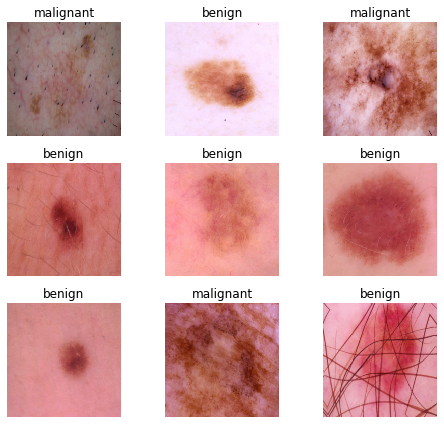

In [11]:
data.show_batch(rows=3,figsize=(7,6))

The images seems to be showing up pretty well. Size is already 224 by 224. All transforms seem to be valid, even lighting changes.

### Attempt using Resnet 34

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/wfenton/snap/code/common/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:14<00:00, 6.16MB/s]


In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


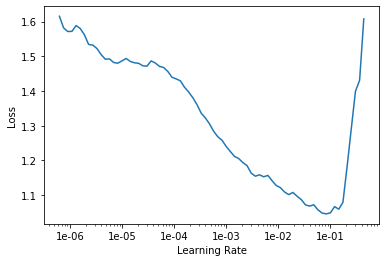

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.589318,0.375758,0.174507,00:13
1,0.394685,0.266803,0.128983,00:13
2,0.334727,0.294399,0.142640,00:12
3,0.263845,0.236949,0.103187,00:12
4,0.213470,0.202764,0.094082,00:12
5,0.193328,0.192483,0.089530,00:12


got to like .13 with 1-e3, .10 with 1e-2

In [16]:
learn.save('stage-1-rn34')

### Model Fine-tuning

In [17]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


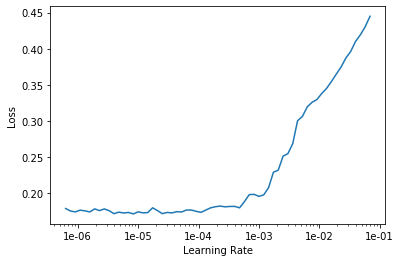

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.211014,0.253205,0.111533,00:17
1,0.246887,0.201100,0.093323,00:17
2,0.203760,0.223497,0.103945,00:17
3,0.179026,0.158544,0.074355,00:17
4,0.142409,0.135151,0.061457,00:17


In [20]:
learn.save('stage-2-rn34')

Should I add iterative resizing? Hard to tell if this can get under .103

## Resnet-50 Attempt
Just repeating the process using the resnet 50 model. 

In [21]:
torch.cuda.empty_cache()

In [22]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [23]:
data50 = data = ImageDataBunch.from_folder(path, train="/train", valid_pct=0.2,
                                  ds_tfms=tfms, size=224, bs=bs//2).normalize(imagenet_stats)

In [24]:
learn50 = cnn_learner(data50, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/wfenton/snap/code/common/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:12<00:00, 8.17MB/s]


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


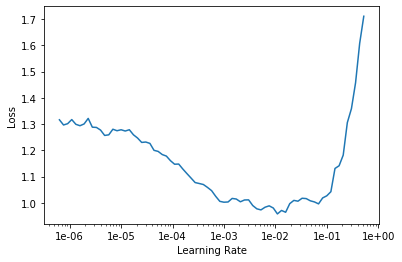

In [25]:
learn50.lr_find()
learn50.recorder.plot()

In [26]:
learn50.fit_one_cycle(7, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.462999,0.311064,0.137329,00:26
1,0.461905,0.339669,0.146434,00:24
2,0.366025,0.312372,0.135053,00:24
3,0.289474,0.258119,0.115326,00:24
4,0.251335,0.216946,0.097117,00:25
5,0.213722,0.192665,0.089530,00:25
6,0.192467,0.185441,0.079666,00:25


In [27]:
# learn50.save('stage-1-50')

In [28]:
# learn50.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (5276 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malignant,malignant,malignant,malignant,malignant
Path: data;

Valid: LabelList (1318 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malignant,malignant,malignant,malignant,benign
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

In [29]:
learn50.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


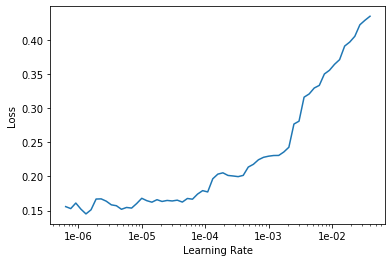

In [30]:
learn50.lr_find()
learn50.recorder.plot()

In [31]:
learn50.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.177295,0.200229,0.085736,00:33
1,0.171174,0.214690,0.109256,00:33
2,0.177582,0.162387,0.069044,00:33
3,0.136452,0.163405,0.067527,00:33
4,0.123209,0.155374,0.060698,00:33


In [32]:
# learn50.save('stage-2-50')

In [36]:
learn50.export()

### First results interpretation:
Turns out I can't actually read Cancer screening images, so I'm just going to go for the full training routine, and maybe we'll get someone to look at this later.

In [33]:
interp = ClassificationInterpretation.from_learner(learn50)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

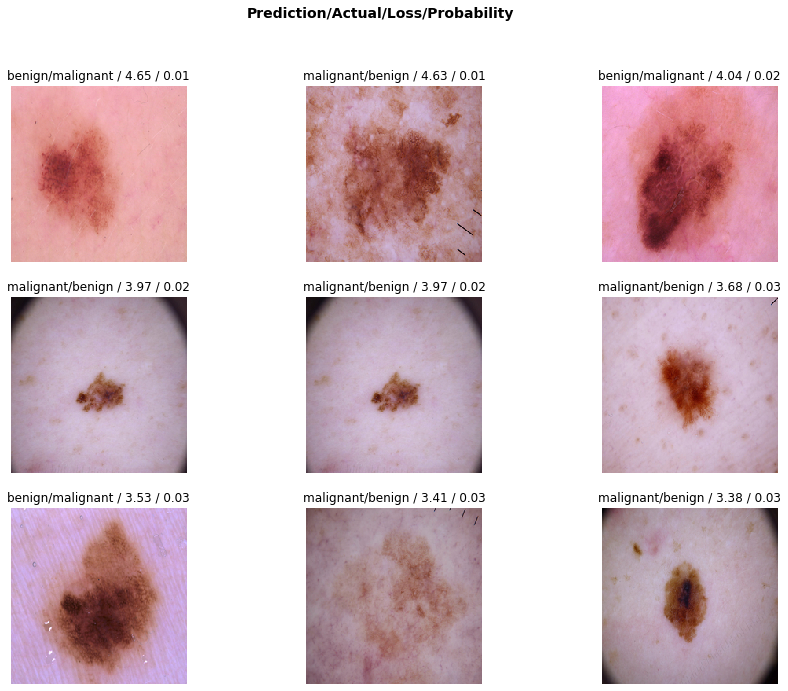

In [34]:
interp.plot_top_losses(9, figsize=(15,11))